# First contact with GitHub Practical

thanks to Alison Horst for the data-set
https://allisonhorst.github.io/palmerpenguins/

*This Practical: version 18 Oct 2023*

## First set-up
As a general ML tool we are going to use `scikit-learn`  available https://scikit-learn.org/stable/index.html

For this, the following tools should be present

- python
- jupyter-notebook
- numpy
- scipy
- matplotlib

    these are  fundations for data-science in python

- scikit-learn  the ML tool in use today

Here we are going to use the collaborative [ML tool by Google](https://colab.research.google.com) where everything is already installed. In this case, simply copy this notebook to the colab space, or into your google drive.

*Alternatively, you may want to have it on your own computer.
Then the best way to get them is to install the Anaconda python distribution, available [here](https://www.anaconda.com/products/individual)*

    scikit-learn one might not be installed - The best is to install it from within the jupyter notebook itself.

    to do so, remove the initial `#` sign in the cell below and execute it (don't put a blank - the line should start with the `!` sign.

    It should do it (it might take some time though).
    You may have to restart the knotebook kernel after that (in the menu Kernel, select  **"Restart and clear Output"** )

*Then you will have to start the notebook itself, either by using the Ananconda launcher (choose notebook) or with the command `jupyter notebook` or `jupyter-notebook` depending on your set-up.*

In [1]:
!pip install scikit-learn
# this will install scikit-learn into your local system
# It is only needed if you run the notebook on your computer and not over internet

# Remarks
What do you think

- A/ COLAB is cool
    - you can run big computation from your smartphone
    - everything is already installed - no pain
    - you can share stuff with others
- B/ Anaconda is cool
    - you can run very long computation without worrying
    - you control exactly what you installed / what you use
    - nobody can interfere with your stuff
- C/ BUT
    - motivations ?
    - financing ?
    - little story about github ...

Once the Notebook is running, the user interface is slightly different whether you are on COLAB or running locally.

Execute each cell using the button **"Run"**.

For text, select **"Markdown"** in the menu below the Help menu (and discover *Markdown* notation !)

Use the **Help** menu a lot and the scikit-learn documentation !!!

---

The questions are marked like this:

# Qn

You will probably to enter some text or some code, do this by clicking on the **"+"** button above.

For text, select **"Markdown"** in the menu below the Help menu (and discover *Markdown* notation !)

Use the **Help** menu a lot !!!

# Q0

We are going to use `scikit-learn`  - This is a huge program.

We can start here: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## Then start the Practical

first load all the libraries we are going to use

In [2]:
# import tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# select a simple display mode
%matplotlib inline

# select simple error messages
%xmode Plain

Exception reporting mode: Plain


## with python
- check `Presentation.ipynb`

## then the data

![penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)

The story is [HERE](https://allisonhorst.github.io/palmerpenguins/)

And the data there:

- https://portal.edirepository.org/nis/mapbrowse?packageid=knb-lter-pal.219.3
- https://portal.edirepository.org/nis/mapbrowse?packageid=knb-lter-pal.220.3
- https://portal.edirepository.org/nis/mapbrowse?packageid=knb-lter-pal.221.3

notice the doi in the code below

In [3]:
# Adelie penguin data from: https://doi.org/10.6073/pasta/abc50eed9138b75f54eaada0841b9b86
uri_adelie = "https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.219.3&entityid=002f3893385f710df69eeebe893144ff"

# Gentoo penguin data from: https://doi.org/10.6073/pasta/2b1cff60f81640f182433d23e68541ce
uri_gentoo = "https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.220.3&entityid=e03b43c924f226486f2f0ab6709d2381"

# Chinstrap penguin data from: https://doi.org/10.6073/pasta/409c808f8fc9899d02401bdb04580af7
uri_chinstrap = "https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.221.2&entityid=fe853aa8f7a59aa84cdd3197619ef462"


# Q1
Check to be sure what [Digital_object_identifier](https://en.wikipedia.org/wiki/Digital_object_identifier) means and what is [www.doi.org](http://www.doi.org)

# R1
DOI for Digital Object Identifier is a very important step for open and reproducible science.

It is a system of designating resources on the Internet in a secure and reproducible way.
This is indeed not the case for regular URI (Uniform Resource Identifier) or URL (Uniform Resource Location) which are not warrantied to exists at the time you use them.

On the other hand a DOI is warrantied to be accessible. It does this through a *handle* system, where the doi.org database does not hold the content, but a valid URI for the content. Would this URI change, it would simply consists in changing the pointer in the DOI Database.

DOI was first created to access scientific literature, it has now been extended naturally to scientific data.

DOI does not warranty that the resource is freely accessible, but that it exists.

[FAIR](https://en.wikipedia.org/wiki/FAIR_data) system extend this to open source and open data, and insure a free access


# Q2
Download on the data table by either

- using the URI in your browser
- or (easier) by using the doi link

and look at it - *(`.csv` are text files)*

CSV means *(comma separated values)* - it is a VERY GENERAL exchange format for tabulated data

On the other hand, structured data are usually exchange in JSON format ...


# R2
looking at the 5 first lines of the adelie data-set, this is what you find:

In [4]:
"""
studyName,"Sample Number",Species,Region,Island,Stage,"Individual ID","Clutch Completion","Date Egg","Culmen Length (mm)","Culmen Depth (mm)","Flipper Length (mm)","Body Mass (g)",Sex,"Delta 15 N (o/oo)","Delta 13 C (o/oo)",Comments
PAL0708,1,"Adelie Penguin (Pygoscelis adeliae)",Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181,3750,MALE,,,"Not enough blood for isotopes."
PAL0708,2,"Adelie Penguin (Pygoscelis adeliae)",Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186,3800,FEMALE,8.94956,-24.69454,
PAL0708,3,"Adelie Penguin (Pygoscelis adeliae)",Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195,3250,FEMALE,8.36821,-25.33302,
PAL0708,4,"Adelie Penguin (Pygoscelis adeliae)",Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,,,,,,,,"Adult not sampled."
""";

- it is a text file
- this is a tabulated data-set (like a big table)
- each piece of info (field) is separated with commas, and each line is independent
- the first line contains the name of each columns
- the following lines are entries in the data-set
- all fields are textual, but certain entries can be interpreted as numbers (either float or integer)
- if a field contains a blank, it is set in **"** if it contains one on those char: {" , \ } then is is prefixed with a \\ ( hence  \\"  \\,  or \\\\)

### loading into pandas
we can load directly from the uri using pandas - just load a few columns though

In [5]:
cols =["Culmen Length (mm)","Culmen Depth (mm)","Flipper Length (mm)","Body Mass (g)","Sex"]
adelie = pd.read_csv(uri_adelie, usecols=cols)
gentoo  = pd.read_csv(uri_gentoo, usecols=cols)
chinstrap  = pd.read_csv(uri_chinstrap, usecols=cols)

Rapid check of the content

In [6]:
print(len(chinstrap)," entries")


68  entries


# Doc of read_csv() 
you should know and **use** jupyter automatic doc !!!

In [7]:
pd.read_csv?

In [8]:
adelie

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
147,36.6,18.4,184.0,3475.0,FEMALE
148,36.0,17.8,195.0,3450.0,FEMALE
149,37.8,18.1,193.0,3750.0,MALE
150,36.0,17.1,187.0,3700.0,FEMALE


In [9]:
# describe is a pandas fucntion which shows simply statistics
adelie.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
count,151.000000,151.000000,151.000000,151.000000
mean,38.791391,18.346358,189.953642,3700.662252
std,2.663405,1.216650,6.539457,458.566126
min,32.100000,15.500000,172.000000,2850.000000
25%,36.750000,17.500000,186.000000,3350.000000
50%,38.800000,18.400000,190.000000,3700.000000
75%,40.750000,19.000000,195.000000,4000.000000
max,46.000000,21.500000,210.000000,4775.000000


Culmen (the bill) parameters :


![Culmen](https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png)

rename columns for easier handling

In [10]:
newnames = {"Culmen Length (mm)": "bill_length",
            "Culmen Depth (mm)": "bill_depth",
            "Flipper Length (mm)":"flipper_length",
            "Body Mass (g)":"mass"}
for df in [adelie, gentoo, chinstrap]:
    df.rename(columns=newnames, inplace=True)

## display

This is a 4 dimensionnal dataset ! (not counting Sex which is not continuous)

The problem is that we do not know how to display a 4-dimensional plot - only 2 !

<Axes: xlabel='bill_length', ylabel='bill_depth'>

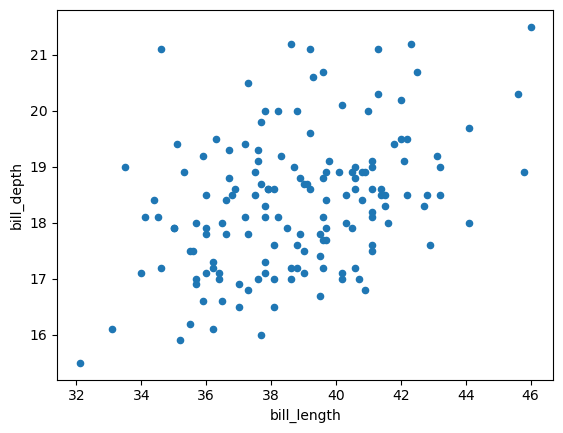

In [11]:
adelie.plot.scatter(x="bill_length", y="bill_depth")
#plt.show()

With all species put together

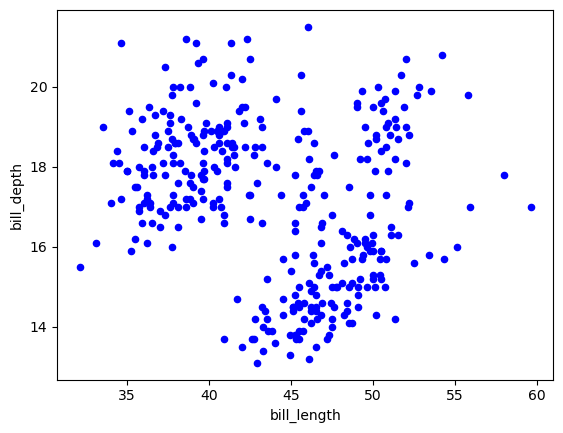

In [12]:
# bill length/depth
fig,ax = plt.subplots()
for df in [adelie, gentoo, chinstrap]:
  df.plot.scatter(x="bill_length", y="bill_depth", color='b', ax=ax)

# adelie.plot.scatter(x="bill_length", y="bill_depth", color='b', ax=ax)
# gentoo.plot.scatter(x="bill_length", y="bill_depth", color='b', ax=ax)
# chinstrap.plot.scatter(x="bill_length", y="bill_depth", color='b', ax=ax)


Of course it is easier if you know who is who

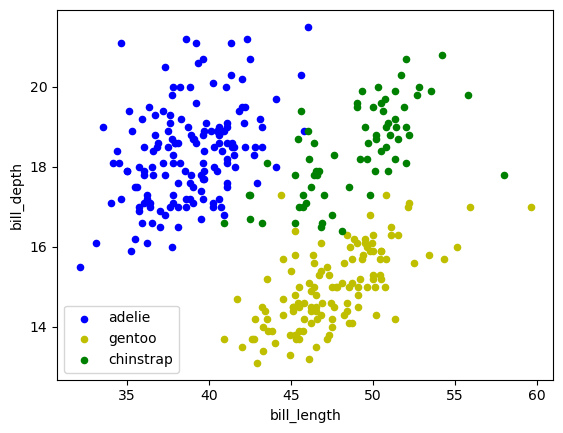

In [13]:
# bill length/depth
fig,ax = plt.subplots()
adelie.plot.scatter(x="bill_length", y="bill_depth", color='b', ax=ax, label='adelie')
gentoo.plot.scatter(x="bill_length", y="bill_depth", color='y', ax=ax, label='gentoo')
chinstrap.plot.scatter(x="bill_length", y="bill_depth", color='g', ax=ax, label='chinstrap')
plt.legend()

In [14]:
adelie.plot.scatter?

but other pairs of variables are not as good

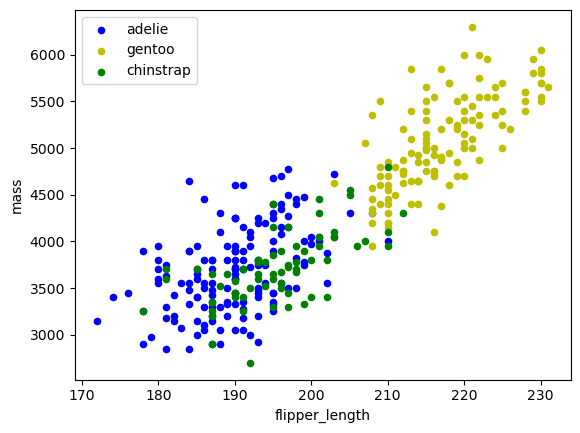

In [15]:
# bill flipper/mass
fig,ax = plt.subplots()
adelie.plot.scatter(x="flipper_length", y="mass", color='b', ax=ax, label='adelie')
gentoo.plot.scatter(x="flipper_length", y="mass", color='y', ax=ax, label='gentoo')
chinstrap.plot.scatter(x="flipper_length", y="mass", color='g', ax=ax, label='chinstrap')
plt.legend()

4 Dimension is actually not that many, we can draw a projection matrix

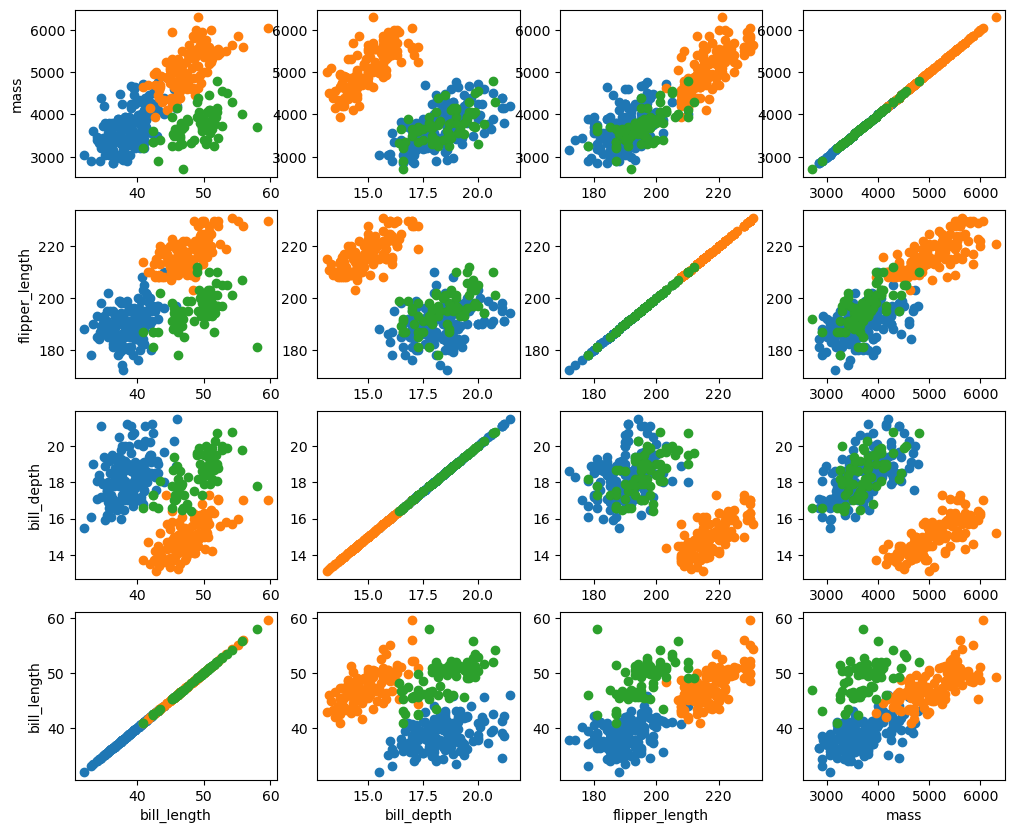

In [16]:
feature_list = ("bill_length", "bill_depth", "flipper_length", "mass")
nfeatures = len(feature_list)
fig, ax = plt.subplots(ncols=nfeatures, nrows=nfeatures, figsize=(12,10))
for ifeat in range(nfeatures):
    for data in (adelie, gentoo, chinstrap):
        y = data[feature_list[ifeat]]
        for jfeat in range(nfeatures):
            x = data[feature_list[jfeat]]
            ax[nfeatures-ifeat-1, jfeat].scatter(x,y)
            if jfeat == 0:
                ax[nfeatures-ifeat-1, 0].set_ylabel(feature_list[ifeat])
            if ifeat == 0:
                ax[nfeatures-1, jfeat].set_xlabel(feature_list[jfeat])


we see that the 3 populations are nearly separated, but not quite.


# Classification

Let's imagine we have measured the penguins characteristics in a blind manner, without knowing their species. Would we be able to tell which is which ?

This is the role of a classifier - which will create rules from examples, in order to separate the classes.
The rules are *learned* from a *training set* and can then be applied on any new data.


# Q3 
would you be able, by hand, to tell a penguin species only from those parameters ?

even for the ambiguous regions ?

## Build the data-set

As we are not able to acquire new data from unknown penguins during this practical, we will split the data-set we have in two parts, a *training set* for the initialization  and a *test set* that we'll use to check the quality of the result.

In [17]:
# first concatenate the different lists
fulldata = pd.concat([adelie,gentoo,chinstrap], keys=['adelie','gentoo','chinstrap']) #.plot.scatter(x="bill_length", y="bill_depth")
print("concatenated dataset has %d entries"%(len(fulldata)))

# get the typology
typo = fulldata.index.codes[0] # 0 for adelie  1 for gentoo  2 for chinstrap

# then keep only the 4 numerical features: bill_length, bill_depth, flipper_length, mass
simpledata = fulldata[["bill_length", "bill_depth", "flipper_length", "mass"]]
simpledata.describe()

concatenated dataset has 344 entries


,bill_length,bill_depth,flipper_length,mass
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


and plot one example

<Axes: xlabel='bill_length', ylabel='bill_depth'>

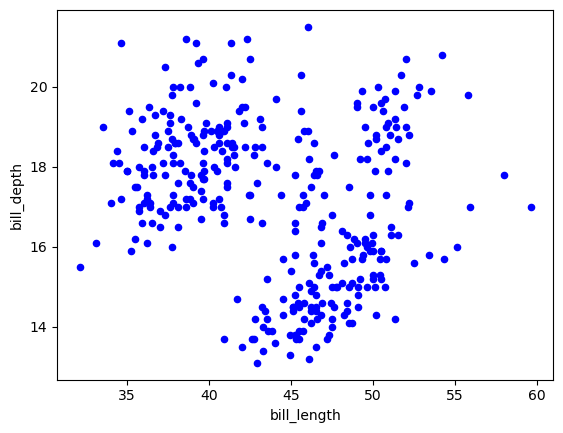

In [18]:
# bill length/depth
fig,ax = plt.subplots()
simpledata.plot.scatter(x="bill_length", y="bill_depth", color='b', ax=ax)


on little difficulty - 342 values for 344 entries => there are empty entries !

Check the csv file above.

and check this:

In [19]:
simpledata['bill_length'][1:5]

adelie  1    39.5
        2    40.3
        3     NaN
        4    36.7
Name: bill_length, dtype: float64

nan or `NaN` stands for **N**ot**AN**umber and is used whenever a numerical value is missing.

**Most code will stop if there are `NaN` in the dataset** (but not plotting methods)

=> we have to remove these values, and "clean" the data-set

**By chance**

*missing values* are **i)** very common **ii)** very easy to clean when there are only a few

correcting for missing values is required when there are many of them. *Imputation* means that a value is set to the missing values.

- What would be the best imputation method here ?
- Which bias  each method would add to the analysis

In [20]:
cleaned = simpledata.dropna()
typo = cleaned.index.codes[0]

## We can always plot a 3D view


In [21]:
from mpl_toolkits.mplot3d import Axes3D
def ftc3(elevation=30.0, azimuth=60.0):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(simpledata.flipper_length, simpledata.bill_length, simpledata.mass, marker='o')
    ax.view_init(elev=elevation, azim=azimuth, roll=0)
# interactive( ftc3, elevation=(1.0,90), azimuth=(0.0,180)) # this will work on your PC

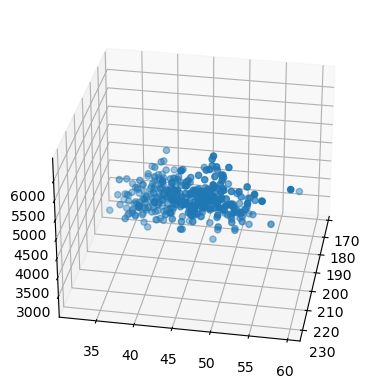

In [22]:
ftc3(elevation=30, azimuth=10)  # static view - change elevation and azimuth

# Q4
try to find `elevation` and `azimuth` values to optimize the display

But it is nevertheless a 2D plot !!! on the screen (there are virtual immersive solution, but beyond access right now)

And it is **Only** 3 dimension, **what about** 4 - or 144 - or 1000 dimensions !!!

**We'll do better** - find the BEST 2D representation:

- the one with more extension on the plane

## Projection using PCA
Principal component Analysis *(ACP Analyse en Composantes Principales)* is a very common approach which consists in, for a $N$ dimensional object, in  finding a projection of this object in a $P$ dimensional space, with $P<N$.

Reducing the dimension of the problem is a standard way of reducing the size of a high dimension data-set by embeding it into a lower dimension space, witout loosing to much information. Reducing the size of the data-set allows to apply more complex methods which require more processing power or large memory space.

Another use of this technique is to project to 2D or 3D space, so that a meaning full picture can be build (which is not possible in higher dimensions)

Here we have $N=4$ and we can project it in 2D ($P=2$) for an easier estimate of the results.

PCA choose the orientation where the cloud of points have the largest extension (the correct word is *largest intertial moment* ).
The largest extention axis is called the first Principal Component **PC1** then **PC2**.
The following ones PC3 and PC4 here are smaller hidden (or drawn orthogonal to the screen if you wish)

To do this trick, PCA can use several methods *(which differ mostly by their speed/robustness against very large data-sets)*.
Standard methods are : Diagonalisation, SVD, incremental SVD, NIPALS, ...


explained variance ratio (first two components): [9.99891315e-01 8.01178384e-05]


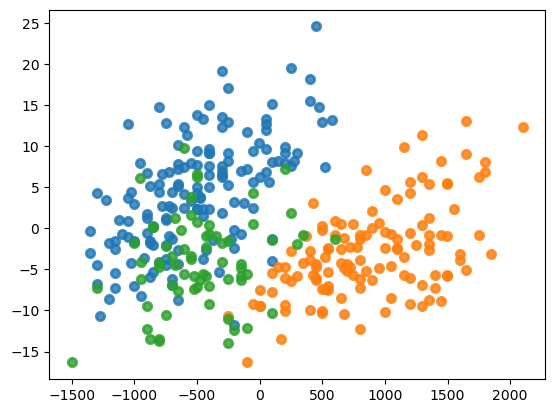

In [23]:
# from https://sklearn.org/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
solpca = pca.fit(cleaned)
X_r = solpca.transform(cleaned)
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

colors = ['navy', 'turquoise', 'darkorange']
names = [adelie, gentoo, chinstrap]
lw = 2
#plt.scatter(X_r[typo==0,0], X_r[typo==0,1])
for color, i, target_name in zip(colors, [0, 1, 2], names):
    plt.scatter(X_r[typo == i, 0], X_r[typo == i, 1], alpha=.8, lw=lw, label=target_name)


### The projection chosen by the PCA is stored by a rotation matrix

In [24]:
solpca.components_

array([[ 0.00405128, -0.00116205,  0.0152752 ,  0.99987444],
       [-0.30848927,  0.09044334, -0.94678621,  0.01581922]])

The way the data variables are displayed in this projection infroms about their weight in the description of the point cloud.
We can display them in the projection axis:

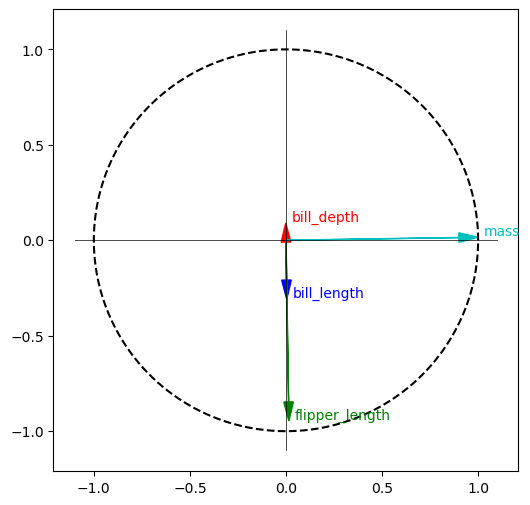

In [25]:
def draw_var(solution):
    t = np.linspace(0,2*np.pi,2000)
    fig,ax = plt.subplots(figsize=(6,6))
    ax.plot(np.cos(t), np.sin(t), 'k--')
    ax.plot([-1.1,1.1],[0,0], 'k', lw=0.5)
    ax.plot([0,0], [-1.1,1.1], 'k', lw=0.5)
    colors=('b','r','g','c')
    for i in range(4):
        ax.arrow(0,0, solution[0,i],solution[1,i], length_includes_head=True, head_width=0.05, head_length=0.1, color=colors[i])
        ax.text(solution[0,i]+0.03, solution[1,i]+0.01, feature_list[i], color=colors[i])
draw_var(solpca.components_)

# Supervised / Unsupervised

It is important to realize that PCA did not know any thing about the 3 penguin species.
It only had a big flat array to crunch.
It is called an **Unsupervised** analysis.
Even though, it did not know much about the species, it rather did a good job in separating the 3.

On the other hand, if we know which species are each individual penguins, we can try to find a 2D projection which better separate the three species.
This is called a **Supervised** Analysis.
*Linear Discriminant Analysis* is an equivalent to PCA when classes are known.
Let's compare them.

explained variance ratio (first two components): [0.86604598 0.13395402]


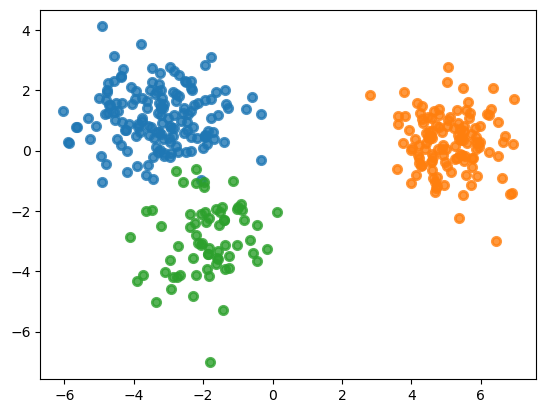

In [26]:
# from https://sklearn.org/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
sollda = lda.fit(cleaned, typo)

X_r = sollda.transform(cleaned)
print('explained variance ratio (first two components): %s'
      % str(lda.explained_variance_ratio_))

colors = ['navy', 'turquoise', 'darkorange']
lw = 2
#plt.scatter(X_r[typo==0,0], X_r[typo==0,1])
for color, i, target_name in zip(colors, [0, 1, 2], (adelie, gentoo, chinstrap)):
    plt.scatter(X_r[typo == i, 0], X_r[typo == i, 1], alpha=.8, lw=lw, label=target_name)


# Q5
compare PCA and LDA

what is the difference in terms of
- given information to the program
- returned information by the program

# R5
*This is indeed **much** better!*

but just another point of view.

Difference between **Supervised** (LDA) and **Unsupervised** (PCA)

We can also see that the choice of meaningful variables is quite different !

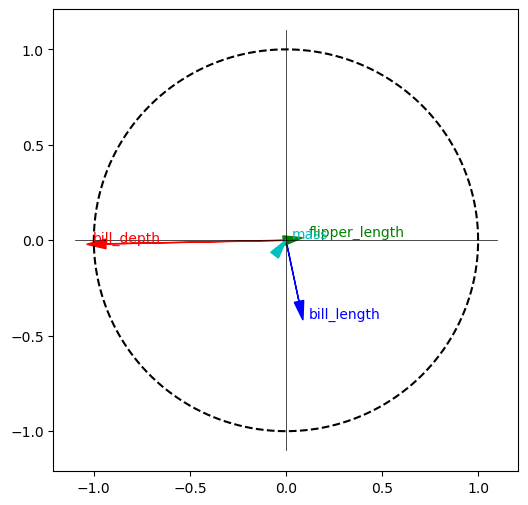

In [27]:
draw_var(sollda.scalings_.T)

In [28]:
sollda.scalings_.T

array([[ 0.08832666, -1.03730494,  0.08616282,  0.00129952],
       [-0.41787088, -0.02100485,  0.01347468,  0.00171144]])

# Classification

Let's imagine we have measured the penguins characteristics in a blind manner, without knowing their species. Would we be able to tell which is which ?

This is the role of a classifier - which will create rules from examples, in order to separate the classes.
The rules are *learned* from a *training set* and can then be applied on any new data.


## Build the data-set

As we are not able to acquire new data from unknown penguins during this practical, we will split the data-set we have in two parts, a *training set* for the initialization  and a *test set* that we'll use to check the quality of the result.

In [29]:
# first concatenate the different lists
fulldata = pd.concat([adelie,gentoo,chinstrap], keys=['adelie','gentoo','chinstrap']) #.plot.scatter(x="bill_length", y="bill_depth")
print("concatenated dataset has %d entries"%(len(fulldata)))


# get the typology
typo = fulldata.index.codes[0] # 0 for adelie  1 for gentoo  2 for chinstrap

# then keep only the 4 numerical features: bill_length, bill_depth, flipper_length, mass
simpledata = fulldata[["bill_length", "bill_depth", "flipper_length", "mass"]]

concatenated dataset has 344 entries


## very important step -
separate Training and Test subsets

`test_size=0.25` below means that 25% of the entries will be randomly kept aside, not used for the training , and used for the test step.



In [30]:
from sklearn.model_selection import train_test_split
# train_test_split does the work for us
# we use standard X and y nomenclature
X_train, X_test, y_train, y_test = train_test_split(simpledata, typo, test_size=0.25)


# Q6
check manually the created arrays6

# R6

In [31]:
# check the created variables
X_train

bill_length  bill_depth  flipper_length    mass
gentoo    97         46.9        14.6           222.0  4875.0
chinstrap 25         52.0        19.0           197.0  4150.0
          67         50.2        18.7           198.0  3775.0
adelie    1          39.5        17.4           186.0  3800.0
gentoo    17         49.2        15.2           221.0  6300.0
...                   ...         ...             ...     ...
          65         49.8        16.8           230.0  5700.0
chinstrap 38         46.9        16.6           192.0  2700.0
gentoo    30         47.3        15.3           222.0  5250.0
chinstrap 19         49.2        18.2           195.0  4400.0
          1          50.0        19.5           196.0  3900.0

[258 rows x 4 columns]

In [32]:
y_train, y_test

(array([1, 2, 2, 0, 1, 2, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 1, 2, 0, 0, 2, 0,
        0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 2, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
        1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 1,
        2, 0, 2, 1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
        1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
        1, 1, 1, 1, 0, 2, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
        2, 0, 0, 1, 0, 1, 0, 1, 2, 2, 1, 0, 1, 2, 1, 2, 1, 0, 2, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 2, 2, 1, 0, 1, 0, 1, 0, 2, 2, 2,
        0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 2, 0,
        2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 2,
        2, 0, 1, 0, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        2, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 2, 1, 2, 2], dtype=int8),
 array([0, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 2, 0, 2, 0, 2, 2, 1, 1,
        0, 0, 0, 2, 1, 2, 1, 1, 0, 0, 1, 1

we actually want to predict `y` given `X` using `y_train` and `X_train` as exemple for *Machine Learning* !!!

As `y` is limited to 3 values, it is a **Classification** problem.

## There are many Classification methods

see here for instance [This page](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

We are going to explore just a few

- KNN - a fast an standard one
- random forest - because of specific interesting properties

## KNN
$K^{th}$ Nearest Neighbors is a standard and rapid classifier method, based on an iterative algorithm aggregating points with respect to their distance.

see documentation:
[principle](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)
and
[code](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)


In [33]:
X_train

bill_length  bill_depth  flipper_length    mass
gentoo    97         46.9        14.6           222.0  4875.0
chinstrap 25         52.0        19.0           197.0  4150.0
          67         50.2        18.7           198.0  3775.0
adelie    1          39.5        17.4           186.0  3800.0
gentoo    17         49.2        15.2           221.0  6300.0
...                   ...         ...             ...     ...
          65         49.8        16.8           230.0  5700.0
chinstrap 38         46.9        16.6           192.0  2700.0
gentoo    30         47.3        15.3           222.0  5250.0
chinstrap 19         49.2        18.2           195.0  4400.0
          1          50.0        19.5           196.0  3900.0

[258 rows x 4 columns]

In [34]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# It crashed !  😭

# Q7
## what happens ???

the code above did not work as there are `NaN` in the dataset (look at last error message)

=> we have to remove these values, and "clean" the data-set



# R7
### NaN
looking to the 5th line of the adelie csv file, we see that there are no numerical entries, showing by the consecutive commas.
It actually says in the `comment` field of that line `"Adult not sampled."`

This means that the 4th entry of adelie should have missing values

This is indeed the case.

In [35]:
adelie.iloc[3]

bill_length       NaN
bill_depth        NaN
flipper_length    NaN
mass              NaN
Sex               NaN
Name: 3, dtype: object


by chance *missing values* are **i)** very common **ii)** very easy to clean when there are only a few

correcting for missing values is required when there are many of them. *Imputation* means that a value is set to the missing values.

- What would be the best imputation method here ?
- Which bias  each method would add to the analysis

# Solutions
#### 6.1 imputation
- In the case of the entry found above, it would be useless to set arbitrary values as this entry does not carry any information - neither for training nor for classifying
- In a possible case where one of the features would not be measure while the other are measured, the missing could be assigned to the mean value for instance.

#### 6.2 bias
- in the case of a feature value having a roughly Normal distribution - say mass - imputing the mean value of this distribution is probably not adding a bias, except may be for the tails of the distribution
- if too many values are missing for a given feature, then the exact value of the mean will appear with a too high probability in the imputed data-set, creating a bias. In this case, it might be a good idea to impute with a random value following the natural distribution (for instance mean + a random shift computed from standard deviation)
- in the case of a non Normal distribution (for instance long tail, or binomial), this is more complex, and should be considered with a lot of care !

In [36]:
# clean the data-set by removing entries with NaN entries
cleaned = simpledata.dropna()
print("cleaned dataset has %d entries"%(len(cleaned)))

cleaned dataset has 342 entries


it's ok, we did not loose too many entries

so we redo the typo and the splitting

In [37]:
from sklearn.neighbors import KNeighborsClassifier
cleaned = simpledata.dropna()
typo = cleaned.index.codes[0] # 0 for adelie  1 for gentoo  2 for chinstrap
X_train, X_test, y_train, y_test = train_test_split(cleaned, typo, test_size=0.25)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [38]:
# That was fast, let's test the quality
print("Mean accuracy of test after training",clf.score(X_train, list(y_train)))

Mean accuracy of test after training 0.90625


## checking the quality of the result

## Confusion Matrix

We'll use and create some tools:

In [39]:
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef
try:  # it's kind of a new version...
    from sklearn.metrics import ConfusionMatrixDisplay
except:
    ConfusionMatrixDisplay = None
    pass # we'll do without
from sklearn.metrics import accuracy_score

def report(y_true, y_predicted):
    "output a few descriptors of the quality of a classifier"
    cm = confusion_matrix(y_true, y_predicted)
#    print("Classification report for classifier\n%s:\n\n%s"% (clf, classification_report(y_true, y_predicted)))
    print("Mean accuracy: %.3f"%accuracy_score(list(y_true), list(y_predicted)))
    print("Matthew’s correlation coefficient: %.3f"%matthews_corrcoef(y_true, y_predicted))
    print("Confusion matrix:\n", str(cm))
    if ConfusionMatrixDisplay:
        dls = ["adelie", "gentoo", "chinstrap"]
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dls)
        disp.plot()
    else:
        plt.imshow(confusion_matrix(y_true, y_predicted))


### first on the training set

Mean accuracy: 0.906
Matthew’s correlation coefficient: 0.853
Confusion matrix:
 [[96  5  5]
 [ 2 96  1]
 [ 9  2 40]]


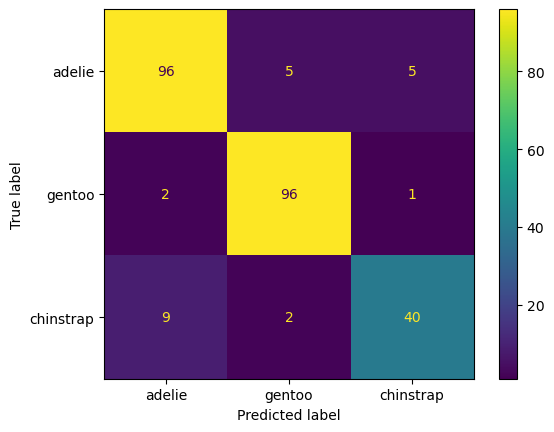

In [40]:
report(y_train, clf.predict(X_train))

### then using the test set
to see how the trained system is able to evaluate on unseen values so far

Mean accuracy: 0.767
Matthew’s correlation coefficient: 0.616
Confusion matrix:
 [[36  2  7]
 [ 0 24  0]
 [10  1  6]]


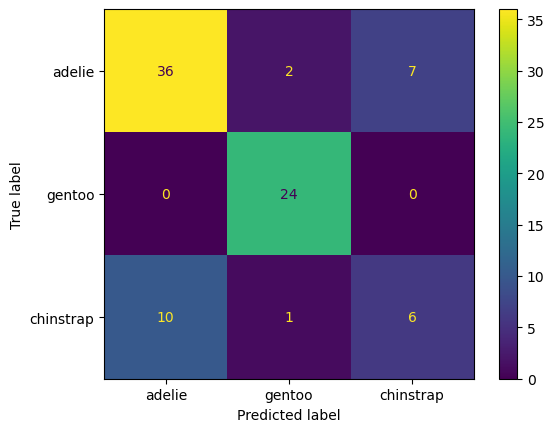

In [41]:
report(y_test, clf.predict(X_test))

Obviously, it is not so good.

### We can check what does it say on the whole set
first using the already trained system

Mean accuracy: 0.871
Matthew’s correlation coefficient: 0.797
Confusion matrix:
 [[132   7  12]
 [  2 120   1]
 [ 19   3  46]]


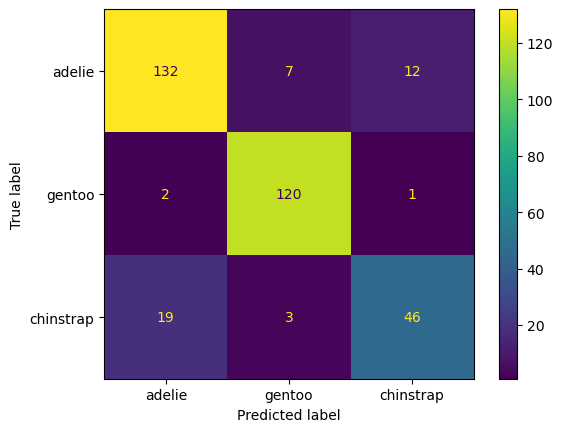

In [42]:
report(typo, clf.predict(cleaned))

### then using a new training
on the whole data-set.

that's where we can expect the best result, but we loose the test capacity

Mean accuracy: 0.912
Matthew’s correlation coefficient: 0.862
Confusion matrix:
 [[143   4   4]
 [  2 119   2]
 [ 15   3  50]]


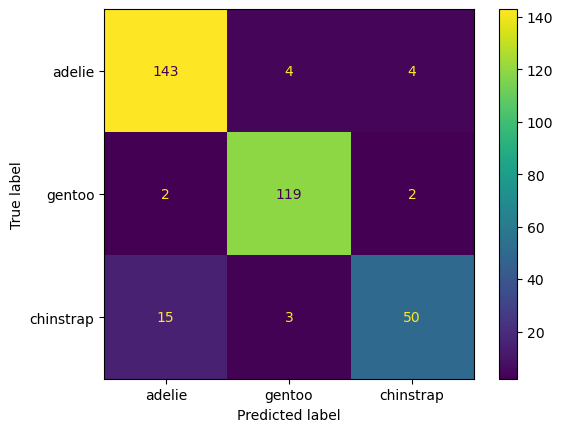

In [43]:
clf2 = KNeighborsClassifier(n_neighbors=3)   # we create a new KNN clasifier
clf2.fit(cleaned, typo)
report(typo, clf2.predict(cleaned))

This is indeed better !

However we lost the capacity to evaluate the results in a satisfactory manner. *Cross-Validation* (i.e. check on data not seen during the training) is very important. [see here](https://scikit-learn.org/stable/modules/cross_validation.html) .

In particular we want to avoid **over-fitting** where a model adapt very well to the training-set, but actually too well, even to the noisy fluctuation *(think of it as a selection which would draw a little square around every data pooint)*

When we are dealing with a fast method and a small dataset (as it is here) it is possible to use the *Jack knife* method (called *leave one out* in scikit-learn - as used in the above link).

The principle is to reduce the test-set to one sample, but to construct all the possible training, and construct a statistic from all the partial training.

The method is readily available in scikit-learn [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html)

[K-Fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold) is another technique which is kind of intermediate between a simple test-set and Jack-knife


### using LeaveOneOut *(Jack knife)*

In [44]:
from sklearn.model_selection import LeaveOneOut
from time import time
loo = LeaveOneOut()
loo.get_n_splits(cleaned)

342

Mean accuracy: 0.792
Matthew’s correlation coefficient: 0.670
Confusion matrix:
 [[127  11  13]
 [  8 113   2]
 [ 33   4  31]]

CPU times: user 1.06 s, sys: 0 ns, total: 1.06 s
Wall time: 1.06 s


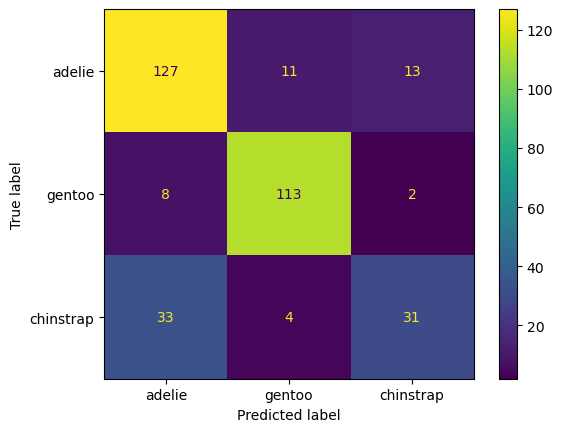

In [45]:
%%time
y_pred = []
cleanarray = cleaned.to_numpy()
for train_index, test_index in loo.split(cleaned):     # for all element
    clf2.fit(cleanarray[train_index], typo[train_index])  # do the fit
    y_pred.append( clf2.predict(cleanarray[test_index])[0] )
report(typo, y_pred)
print()

# normalizing the values

It is possible to normalize the entries by removing the mean, and scaling by the standard deviation, so that each feature values follow roughly a normal law.

Let's use https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html for that

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # create
scaler.fit(cleaned)        # compute mu and sigma
scaled = scaler.transform(cleaned)  # generate new data


In [47]:
pd.DataFrame(scaled)

,0,1,2,3
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
3,-1.324737,1.089724,-0.563715,-0.938776
4,-0.847812,1.748985,-0.777373,-0.689020
...,...,...,...,...
337,2.178824,1.343286,0.433355,-0.251947
338,-0.077396,0.481175,0.077258,-1.001215
339,1.041543,0.531887,-0.563715,-0.532923
340,1.261662,0.937586,0.647013,-0.127069


Mean accuracy: 0.988
Matthew’s correlation coefficient: 0.982
Confusion matrix:
 [[150   0   1]
 [  0 123   0]
 [  3   0  65]]



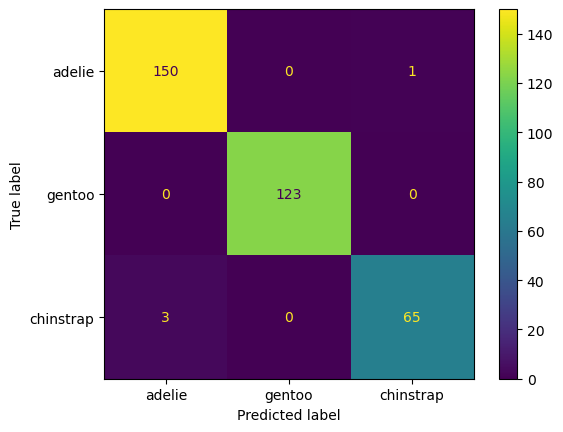

In [48]:
clf2 = KNeighborsClassifier(n_neighbors=3)   # we create a new KNN clasifier

y_pred = []
loo = LeaveOneOut()
for train_index, test_index in loo.split(scaled):     # for all element
    clf2.fit(scaled[train_index], typo[train_index])  # do the fit
    y_pred.append( clf2.predict(scaled[test_index])[0] )
report(typo, y_pred)
print()


# Q8
What is happening here

this is obviously **MUCH** better - it is a bit unintuitive, as we feel that the value size (large, small) is an important feature - but it is not !



In [49]:
pd.DataFrame(scaled)

,0,1,2,3
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
3,-1.324737,1.089724,-0.563715,-0.938776
4,-0.847812,1.748985,-0.777373,-0.689020
...,...,...,...,...
337,2.178824,1.343286,0.433355,-0.251947
338,-0.077396,0.481175,0.077258,-1.001215
339,1.041543,0.531887,-0.563715,-0.532923
340,1.261662,0.937586,0.647013,-0.127069


<Axes: ylabel='Frequency'>

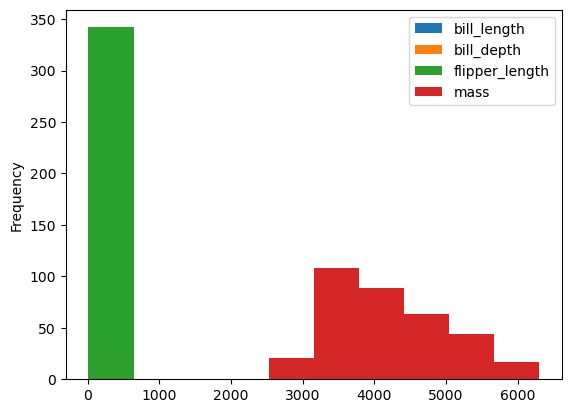

In [50]:
pd.DataFrame(cleaned).plot.hist()

<Axes: ylabel='Frequency'>

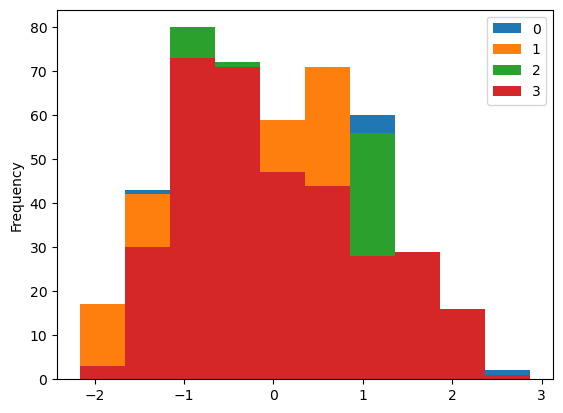

In [51]:
pd.DataFrame(scaled).plot.hist()

# Let's continue

## random forest
is yet another classifier.

*(sorry for this explanation that was missing in the distributed version)*

#### decision trees
It is based on the [**decision tree**](https://en.wikipedia.org/wiki/Decision_tree) tool which is a set of rules on the value of selected features.

However, there are many ways to construct such a decision tree, depending on the data, but also how you start to look at it (hos you *bootstrap* the analysis).
So many different trees are possible, so let's plant a forest of different decision trees.
This will be the **random forest**.

So on a given prediction question, each tree of the forest will give an answer, possibly different, and we will use each answer as a ballot, and choose the winner of the vote.

#### This approach has many advantages
- the rules in the decision tree give a *rational* for the prediction of the program, something other models usually cannot provide
- the result of the ballot gives a measure of the confidence of the prediction.
- there are many hyperparameter to adapt to your problem (min and max size of the trees, size of the forest, optimization algorithm, etc.)

#### However
it is sensitive to overfitting, in particular in the case of small datasets (imagine a rule per sample => no generalization is possible)

# Implementing it

The documentation is [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

By chance, the API of scikit-learn (application Programming Interface) is very **regular**, and it is just a matter of copying things over from the previous examples

on test set
Mean accuracy: 0.942
Matthew’s correlation coefficient: 0.909
Confusion matrix:
 [[40  0  1]
 [ 0 24  0]
 [ 4  0 17]]


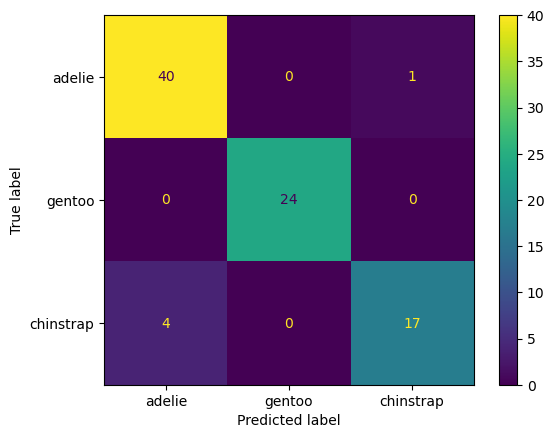

In [52]:
# import that new tool
from sklearn.ensemble import RandomForestClassifier

# create the classifier, using default values
clfrf = RandomForestClassifier()

# split dataset as usual
X_train, X_test, y_train, y_test = train_test_split(cleaned, typo, test_size=0.25)

# do the training
clfrf.fit(X_train, y_train)

# now report
print('on test set')
print('===========')

report(y_test, clfrf.predict(X_test))

Really impressive - could be some kind of overfitting is taking place.

Let's test that with some validation.

#### First Jack knife
(possible here because Random Forest is not too slow, while slower than KNN)

Mean accuracy: 0.977
Matthew’s correlation coefficient: 0.963
Confusion matrix:
 [[147   1   3]
 [  0 122   1]
 [  3   0  65]]



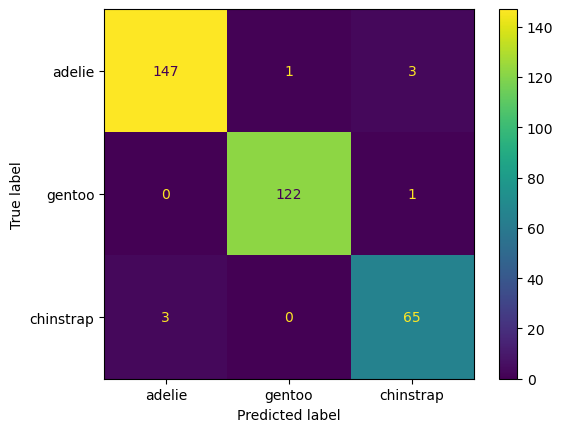

In [53]:
clfrf = RandomForestClassifier()

y_pred = []
loo = LeaveOneOut()
cleanarray = cleaned.to_numpy()
for train_index, test_index in loo.split(cleanarray):     # for all element
    clfrf.fit(cleanarray[train_index], typo[train_index])  # do the fit
    y_pred.append( clfrf.predict(cleanarray[test_index])[0] )
report(typo, y_pred)
print()


#### Then $k$-Fold validation
which is a more stringent test for overfitting

Documentation is [here](https://scikit-learn.org/stable/modules/cross_validation.html#k-fold)

In [54]:
from sklearn.model_selection import KFold

# we'll do 10 repetitions (nb of repetitions determines the size of the test set)

kfold = KFold(n_splits=10, shuffle=True)

# again, the regularity of the PI simplifies the work !
# however the set-up is quite different, as in LOO we had only one answer,

# here we have a complete analysis, the best wayd is to build a confusion matrix for each split,
# and take the mean - or the sum - at the end
# idem for scores
scores = []
confmats = []
cleanarray = cleaned.to_numpy()
for train_index, test_index in kfold.split(cleanarray):     # for all element
    clfrf.fit(cleanarray[train_index], typo[train_index])  # do the fit
    y_true = typo[test_index]
    y_predicted = clfrf.predict(cleanarray[test_index])
    cm = confusion_matrix(y_true, y_predicted)
    confmats.append(cm)
    scores.append( accuracy_score(list(y_true), list(y_predicted)) )

bigcore = sum(scores)/len(scores)
bigcm = sum(confmats)

and report

Mean accuracy: 0.974
Confusion matrix:
 [[147   1   3]
 [  0 122   1]
 [  4   0  64]]


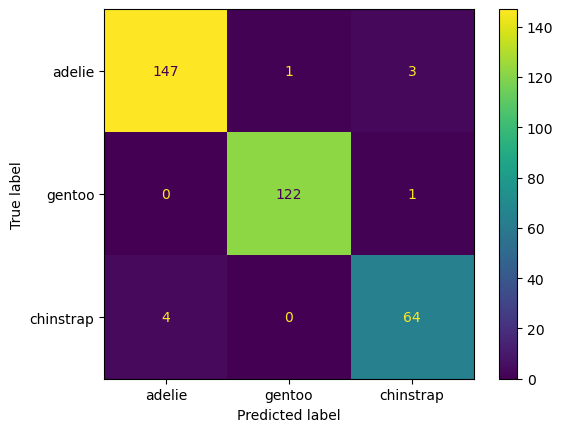

In [55]:
print("Mean accuracy: %.3f"%bigcore)
print("Confusion matrix:\n", str(bigcm))
if ConfusionMatrixDisplay:
    dls = ["adelie", "gentoo", "chinstrap"]
    disp = ConfusionMatrixDisplay(confusion_matrix=bigcm, display_labels=dls)
    disp.plot()
else:
    plt.imshow(bigcm)


We have built a **forest** of **classifier trees**.

The number of tree in the forest, and the depth of each tree (the number of decision nodes) are the two main **hyperparameters** you may want to optimize on a real problem, called respectively  `n_estimators` and `max_depth`.  - here we used the default values.

You might want to play with them and try to minimized the number of parameters all together - proportional to the product of both

The trees are simply stored in a simple list called `estimators_`

In [56]:
len(clfrf.estimators_)

100

In [57]:
clfrf.estimators_[0:3] # print the first 0 entries out of the 100 entries

[DecisionTreeClassifier(max_features='sqrt', random_state=1781694817),
 DecisionTreeClassifier(max_features='sqrt', random_state=1129843347),
 DecisionTreeClassifier(max_features='sqrt', random_state=1289146255)]

and each tree structure can be explored

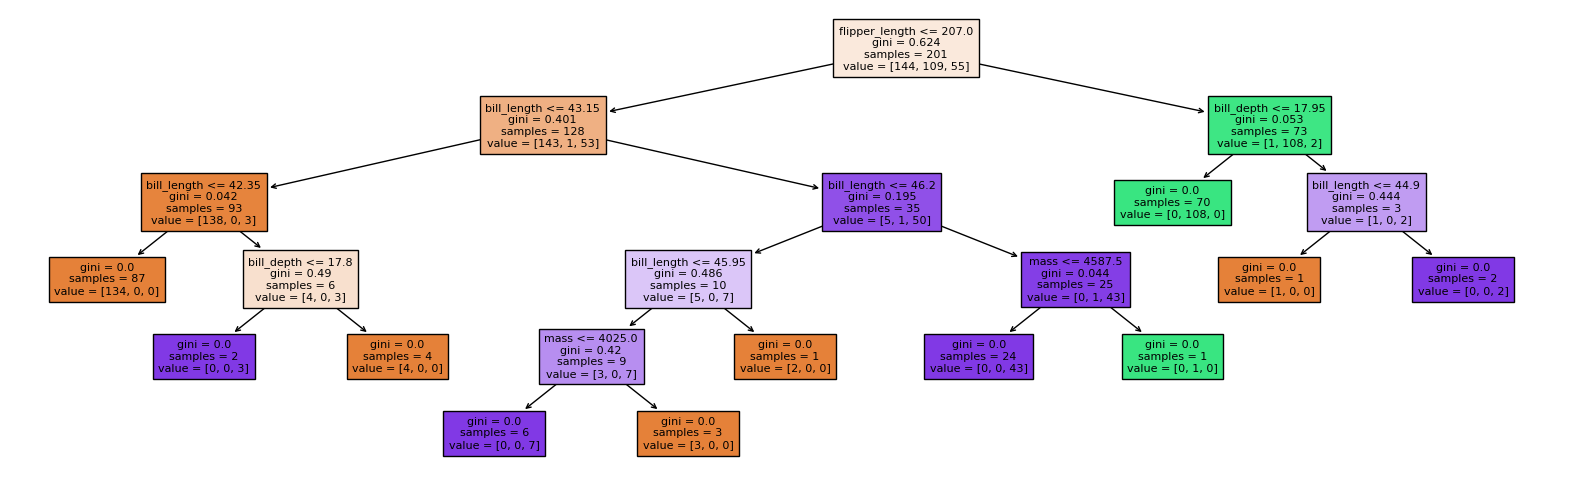

In [58]:
from sklearn import tree
fig,ax = plt.subplots(figsize=(20,6))  # this trick allows to choose the figure size !
# plot the 33rd one
text = tree.plot_tree(clfrf.estimators_[33],
                      feature_names=feature_list, filled=True,
                      ax=ax, fontsize=8)


Here each decision node of **tree 33** is shown as a square,

- *gini* is a measure of the importance of the decision node
- the color coding indicating the *purity* of each node, which is a measure on how the training set is split by this rule, and an important parameter for the fitting of the model

So Random Forest have an inherent capability to **partly explain** how a decision is taken.
There are not so **irresponsible** as other methods.

# Q9
- try to interpret the tree
- try to understand the Gini parameter
